# Chapter 4, Exercise 1: Implement your own Learner

> Create your own implmentation of Learner from scratch, based on the training loop shown in this chapter.

As a reminder, the loop is:

- Init
- Predict
- Loss 
- Gradient
- Step
- Stop

Let's start with the boilerplate:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(42) # Life, the Universe, and Everything

I'll use the signature from the book:

In [2]:
class MyLearner():
    
    def __init__(self, loader, model, opt_func, loss_func, metrics):
        self.loader = loader
        self.model = model
        self.opt_func = opt_func
        self.loss_func = loss_func
        self.metrics = metrics
        
    def fit(self):
        # TODO
        pass

I don't know that I'll do every convenience function they have -- `learn.recorder.values()` for example -- but I'll see what I can do.

Let's create our model:

In [3]:
simple_net = nn.Sequential(
    nn.Linear(in_features=28*28, out_features=30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

Next, the data loader...which I guess means we'll need some data.

Our model has 30 outputs, so let's make some random x, some random labels between 0 & 30, and plot them.

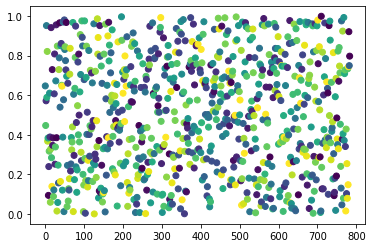

In [4]:
training_data = torch.rand(28*28)
training_labels = torch.randint_like(training_data, 0, 30)

plot_y = torch.arange(0, 28*28)
plt.scatter(plot_y, training_data, c=training_labels)

Whee, that looks random as hell!  

Now time for the loader:

In [5]:
class NoMoreData(Exception):
    '''Nothing left, yo
    '''

class MyLoader():
    def __init__(self, data, batch_size=5): # batch size picked randomly
        self.data = data
        self.batch_size = batch_size
        self.counter = 0
        
    def next(self):
        '''Yield next batch of data.
        '''
        if self.counter == -1:
            # Using this as a signal we're at the end of our rope
            raise NoMoreData
        data_length = data.shape[0]
        if (data_length - self.counter > batch_size):
            start = self.counter
            end = self.counter + self.batch_size
            self.counter += self.batch_size
            data_to_return =  self.data[start:end]
        elif (data_length - self.counter < batch_size):
            start = self.counter
            self.counter = -1
            data_to_return = self.data[start:]
        return data_to_return
    
    def reset(self):
        '''Reset counter so we can get more data
        '''
        self.counter = 0

It would be interesting to try and make this more like C library calls (not sure what the usual practice is there, but I'll bet you I'm not following it 🤣).  It would also be interesting to make this a Python yielder (oh, there's a better term for that...).  But for now, I'll stick with this.

Aw crap...so:  next up would be optimizer.  I want to use the PyTorch SGD optimizer...but this is pretty closely tied with the rest of the Pytorch model API:

> To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable s) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.

```
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam([var1, var2], lr=0.0001)
```

...but wait: we *have* got a PyTorch model :doh:.  Let's use that.

In [6]:
optimizer = optim.SGD(simple_net.parameters(), lr=0.01, momentum=0.9)

As for loss func....right, what the hell are we modelling here?  Let's use the function `x^2 + 3`, for no particular reason except it's easy to graph.

*goes back to re-jig previous cells like nothing happened...*

# TODO

- Might be worth seeing if we can simplify the data, or make it not so random -- that way I'll be able to tell if the learning is actually working.  2 classes would be enough to demonstrate this.

- Loss function

- Rest of the parameters